In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [16]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [17]:
type(california)

sklearn.utils._bunch.Bunch

In [18]:
california.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [19]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [22]:
california.data.shape

(20640, 8)

In [23]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
data.describe().round(2)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [26]:
y = data['Price']
X = data.drop('Price', axis=1)

In [27]:
y.shape, X.shape

((20640,), (20640, 8))

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343242
HouseAge 0.00943577803323799
AveRooms -0.10732204139090373
AveBedrms 0.6450656935198109
Population -3.976389421194229e-06
AveOccup -0.00378654265497092
Latitude -0.4213143775271443
Longitude -0.4345137546747775


In [32]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718444


In [33]:
y_pred = model.predict(X)
print(y_pred[:5])


[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [34]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


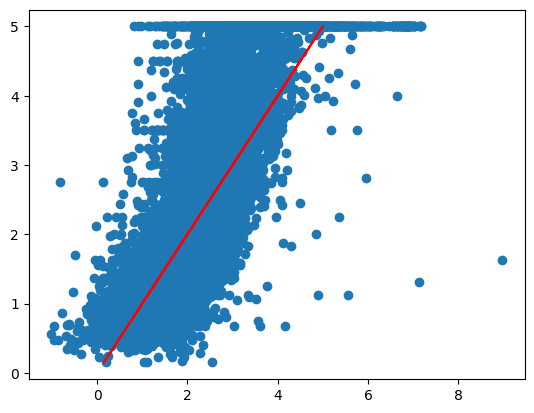

In [35]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [36]:
model.score(X, y)

0.606232685199805

In [37]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)

In [39]:
diabetes.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [40]:
x = diabetes.data
y = diabetes.target

In [42]:
x.shape, y.shape

((442, 10), (442,))

In [43]:
diabetes.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [44]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
_ = [print(k, v) for k, v in zip(x.columns, model.coef_)]

age -10.009866299810486
sex -239.81564367242322
bmi 519.845920054461
bp 324.38464550232356
s1 -792.1756385522308
s2 476.7390210052582
s3 101.04326793803386
s4 177.06323767134657
s5 751.273699557104
s6 67.62669218370485


In [48]:
model.intercept_

np.float64(152.13348416289597)

In [51]:
model.score(x, y)

0.5177484222203499

In [54]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x)
mean_squared_error(y, y_pred)

2859.69634758675

# Доп


In [ ]:
class MultipleLinearRegression(object):
    def __init__(self):
        self.weights = None
        self.last_fit_steps = []
        self.last_fit_errors = []
        self.x_min = None
        self.x_max = None
        self.n_features = None
        self.normalize_data = True  # Флаг для контроля нормализации

    def _prepare(self, arr):
        arr = np.asarray(arr)
        if arr.ndim == 1:
            arr = arr.reshape(-1, 1)
        return arr

    def _add_bias_column(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack([ones, X])

    def normalize(self, X):
        X = self._prepare(X)
        # Защита от деления на ноль
        range_vals = self.x_max - self.x_min
        range_vals = np.where(range_vals == 0, 1, range_vals)
        return (X - self.x_min) / range_vals

    def predict(self, X):
        X = self._prepare(X)
        if self.normalize_data and self.x_min is not None and self.x_max is not None:
            X = self.normalize(X)
        
        X_with_bias = self._add_bias_column(X)
        
        return np.dot(X_with_bias, self.weights)

    def error(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        return np.sum((predictions - Y) ** 2) / (2 * len(X))
    
    def show_last_fit_graph(self):
        plt.figure()
        plt.plot(self.last_fit_steps, self.last_fit_errors, 'g')
        plt.xlabel('Step')
        plt.ylabel('Error')
        plt.title('Gradient Descent Error (Multiple Regression)')
        plt.show()

    def show_model(self, X, Y):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        predictions = self.predict(X)
        
        plt.figure()
        plt.scatter(predictions, Y, alpha=0.6, label='Actual vs Predicted')
        plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Prediction')
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Multiple Linear Regression: Actual vs Predicted')
        plt.legend()
        plt.show()
        
        # R^2 score
        ss_res = np.sum((Y - predictions) ** 2)
        ss_tot = np.sum((Y - np.mean(Y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        print(f"R² Score: {r2:.4f}")

    def fit(self, X, Y, alpha=0.01, accuracy=0.01, max_steps=5000, normalize=None):
        X = self._prepare(X)
        Y = np.asarray(Y).flatten()
        
        self.n_features = X.shape[1]
        self.weights = np.zeros(self.n_features + 1)
        
        # Автоматическое определение необходимости нормализации
        if normalize is None:
            # Проверяем, стандартизированы ли данные (mean≈0, std≈1)
            means = np.mean(X, axis=0)
            stds = np.std(X, axis=0)
            is_standardized = (np.allclose(means, 0, atol=1e-10) and 
                             np.allclose(stds, 1, atol=1e-10))
            self.normalize_data = not is_standardized
            if is_standardized:
                print("Данные уже стандартизированы, нормализация отключена")
            else:
                print("Данные требуют нормализации")
        else:
            self.normalize_data = normalize
        
        if self.normalize_data:
            self.x_min = np.min(X, axis=0)
            self.x_max = np.max(X, axis=0)
            X_norm = self.normalize(X)
        else:
            X_norm = X
            
        X_with_bias = self._add_bias_column(X_norm)
        
        self.last_fit_errors, self.last_fit_steps = [], []
        m = len(X)
        
        step = 0
        while step < max_steps:
            predictions = np.dot(X_with_bias, self.weights)
            error = predictions - Y
            dw = np.dot(X_with_bias.T, error) / m

            self.weights -= alpha * dw
            
            new_err = np.sum(error ** 2) / (2 * m)
            
            step += 1
            self.last_fit_steps.append(step)
            self.last_fit_errors.append(new_err)
            
            if new_err < accuracy:
                print(f'Accuracy reached at step {step}. Final error: {new_err:.6f}')
                break
                
            if step > 1 and self.last_fit_errors[-1] > self.last_fit_errors[-2]:
                alpha *= 0.9  # Более мягкое уменьшение learning rate
                print(f'Error increased at step {step}. New alpha: {alpha:.6f}')
                
            # Проверка на расхождение
            if step > 100 and new_err > 1e10:
                print(f'Algorithm diverged at step {step}. Try smaller learning rate.')
                break
                
        else: 
            print(f'Max steps ({max_steps}) reached. Final error: {new_err:.6f}')
            
        return self.last_fit_steps, self.last_fit_errors

    def get_coefficients(self):
        """Возвращает коэффициенты модели"""
        return {
            'bias': self.weights[0],           
            'weights': self.weights[1:],     
            'features': self.n_features
        }

In [118]:
model = MultipleLinearRegression()
model.fit(x, y, alpha=0.1, accuracy=0.000001, max_steps=10000)

Max steps (10000) reached. Final error: 1436.211453


([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

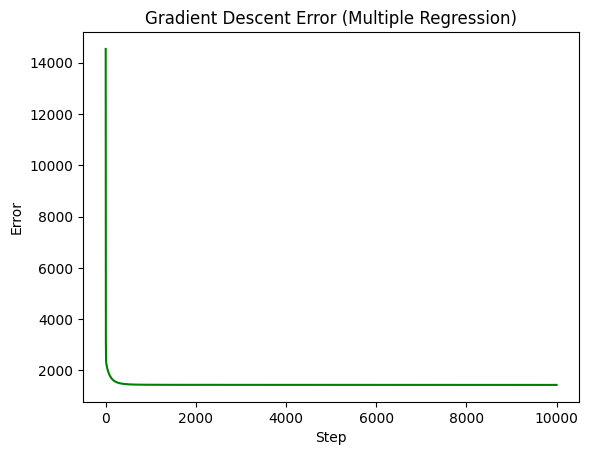

In [119]:
model.show_last_fit_graph()

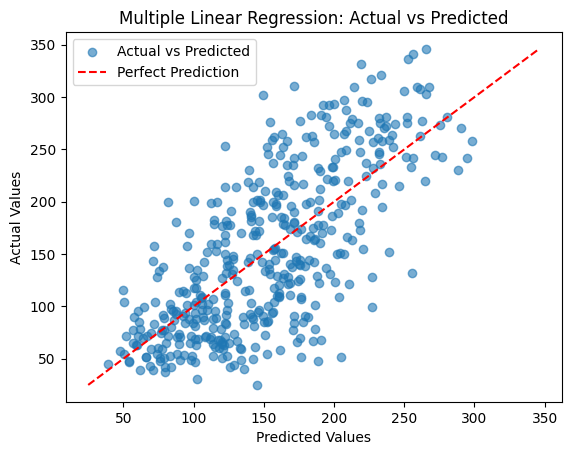

R² Score: 0.5156


In [120]:
model.show_model(x, y)

In [121]:
model.get_coefficients()

{'bias': np.float64(35.42003275861434),
 'weights': array([ -1.61099733, -22.59281558, 137.37962364,  78.67387955,
        -61.23800946,   5.11031375, -42.92518992,  29.22302654,
        139.1549794 ,  18.93271256]),
 'features': 10}

y = 40.53 - 1.07*x1 - 23.29*x2 + 132.47*x3 + 80.6*x4 - 25.37*x5 - 28.16*x6 - 52.9*x7 + 38.35*x8 + 114.67*x9 + 28.04*x10 